# 03. Visualization (시각화)

전처리된 성격 점수 데이터를 시각화합니다.

## 학습 목표
- 상관행렬로 척도 간 관계 파악
- 분포 히스토그램으로 데이터 특성 이해
- 박스플롯으로 이상치 확인

## 참조 파일
- `reports/step1_scan.json` - 기본 데이터 정보
- `reports/step2_preprocess.json` - 계산된 척도 목록, 점수 파일 경로

In [1]:
# 필요한 라이브러리 설치
%pip install pandas numpy matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from glob import glob
from datetime import datetime

# 작업 디렉토리 설정
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
print(f'작업 폴더: {os.getcwd()}')

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

작업 폴더: c:\Users\yujin\code\agent_seminar\sapa-demo


In [3]:
# reports/ 폴더의 Context 파일들 로드
print("=== 참조할 Context 파일들 ===")
for f in sorted(glob('reports/*.json')):
    print(f"  - {f}")

# Step 1 결과 로드
with open('reports/step1_scan.json', 'r', encoding='utf-8') as f:
    step1 = json.load(f)
print(f"\nStep 1: 원본 데이터 {step1['results']['n_respondents']:,}명")

# Step 2 결과 로드
with open('reports/step2_preprocess.json', 'r', encoding='utf-8') as f:
    step2 = json.load(f)
scales = step2['results']['scores']['calculated_scales']
scores_file = step2['results']['scores']['output_file']
print(f"Step 2: {len(scales)}개 척도 계산됨")
print(f"  척도: {scales}")
print(f"  파일: {scores_file}")

=== 참조할 Context 파일들 ===
  - reports\pipeline_context.json
  - reports\step1_scan.json
  - reports\step2_preprocess.json

Step 1: 원본 데이터 23,679명
Step 2: 7개 척도 계산됨
  척도: ['NEO_O', 'NEO_C', 'NEO_E', 'NEO_A', 'NEO_N', 'Ideology', 'Honesty_Humility']
  파일: data/processed/sapa_scores.csv


---
## Part 1: 데이터 로드

In [4]:
# Step 2에서 생성된 점수 파일 로드
scores = pd.read_csv(scores_file)
print(f"점수 데이터 로드 완료: {len(scores):,}명 × {len(scores.columns)}열")
print(f"\n컬럼: {list(scores.columns)}")

# 시각화할 척도 (RID 제외)
viz_cols = [col for col in scores.columns if col != 'RID']
print(f"\n시각화할 척도: {viz_cols}")

점수 데이터 로드 완료: 23,647명 × 8열

컬럼: ['RID', 'NEO_O', 'NEO_C', 'NEO_E', 'NEO_A', 'NEO_N', 'Ideology', 'Honesty_Humility']

시각화할 척도: ['NEO_O', 'NEO_C', 'NEO_E', 'NEO_A', 'NEO_N', 'Ideology', 'Honesty_Humility']


In [5]:
# 기본 통계
scores[viz_cols].describe().round(2)

,NEO_O,NEO_C,NEO_E,NEO_A,NEO_N,Ideology,Honesty_Humility
count,23399.00,23417.00,23357.00,23437.00,23371.00,11825.00,12828.00
mean,4.31,4.23,3.87,4.23,3.35,0.03,-0.00
std,0.83,0.86,0.92,0.82,0.98,0.97,0.73
min,1.00,1.00,1.00,1.00,1.00,-1.53,-2.96
25%,3.78,3.67,3.25,3.71,2.67,-0.88,-0.47
50%,4.33,4.25,3.89,4.25,3.33,0.06,0.04
75%,4.89,4.83,4.50,4.80,4.00,0.87,0.52
max,6.00,6.00,6.00,6.00,6.00,1.67,1.64


---
## Part 2: 상관행렬 (Correlation Matrix)

7개 성격 척도 간의 상관관계를 확인합니다.

✅ 저장: reports/correlation_matrix.png


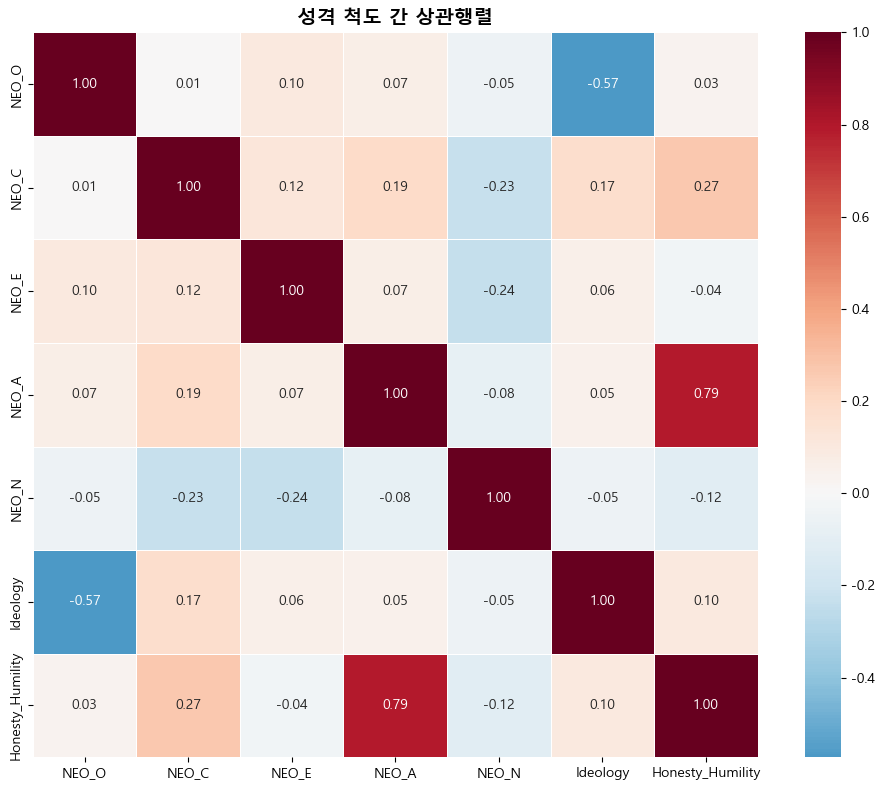

In [6]:
# 상관행렬 계산
corr_matrix = scores[viz_cols].corr()

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            ax=ax)
ax.set_title('성격 척도 간 상관행렬', fontsize=14, fontweight='bold')
plt.tight_layout()

# 저장
plt.savefig('reports/correlation_matrix.png', dpi=150, bbox_inches='tight')
print("✅ 저장: reports/correlation_matrix.png")
plt.show()

---
## Part 3: 분포 히스토그램

각 척도의 점수 분포를 확인합니다.

✅ 저장: reports/big_five_distributions.png


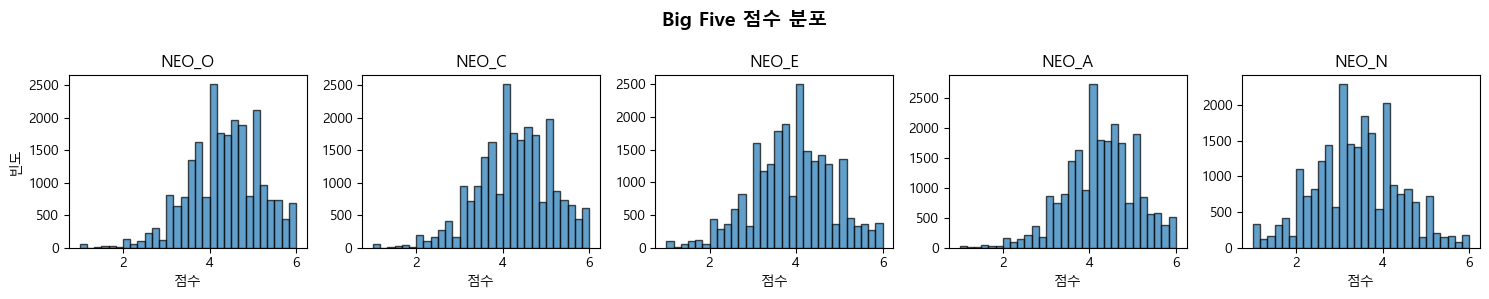

In [7]:
# Big Five 분포
big_five = ['NEO_O', 'NEO_C', 'NEO_E', 'NEO_A', 'NEO_N']

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, col in enumerate(big_five):
    axes[i].hist(scores[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('점수')
    if i == 0:
        axes[i].set_ylabel('빈도')

fig.suptitle('Big Five 점수 분포', fontsize=14, fontweight='bold')
plt.tight_layout()

# 저장
plt.savefig('reports/big_five_distributions.png', dpi=150, bbox_inches='tight')
print("✅ 저장: reports/big_five_distributions.png")
plt.show()

✅ 저장: reports/ideology_hh_distributions.png


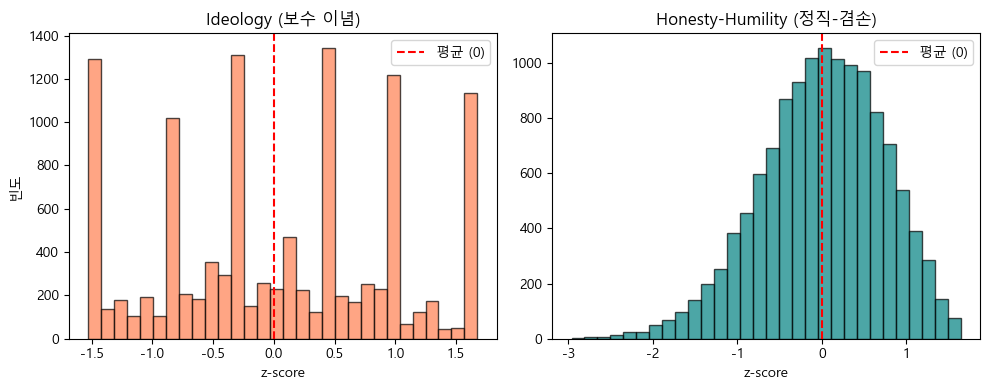

In [8]:
# Ideology & Honesty-Humility 분포 (z-score 기반)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Ideology
axes[0].hist(scores['Ideology'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(0, color='red', linestyle='--', label='평균 (0)')
axes[0].set_title('Ideology (보수 이념)')
axes[0].set_xlabel('z-score')
axes[0].set_ylabel('빈도')
axes[0].legend()

# Honesty-Humility
axes[1].hist(scores['Honesty_Humility'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='teal')
axes[1].axvline(0, color='red', linestyle='--', label='평균 (0)')
axes[1].set_title('Honesty-Humility (정직-겸손)')
axes[1].set_xlabel('z-score')
axes[1].legend()

plt.tight_layout()

# 저장
plt.savefig('reports/ideology_hh_distributions.png', dpi=150, bbox_inches='tight')
print("✅ 저장: reports/ideology_hh_distributions.png")
plt.show()

---
## Part 4: 박스플롯 (Box Plot)

모든 척도를 한눈에 비교합니다.

✅ 저장: reports/big_five_boxplot.png


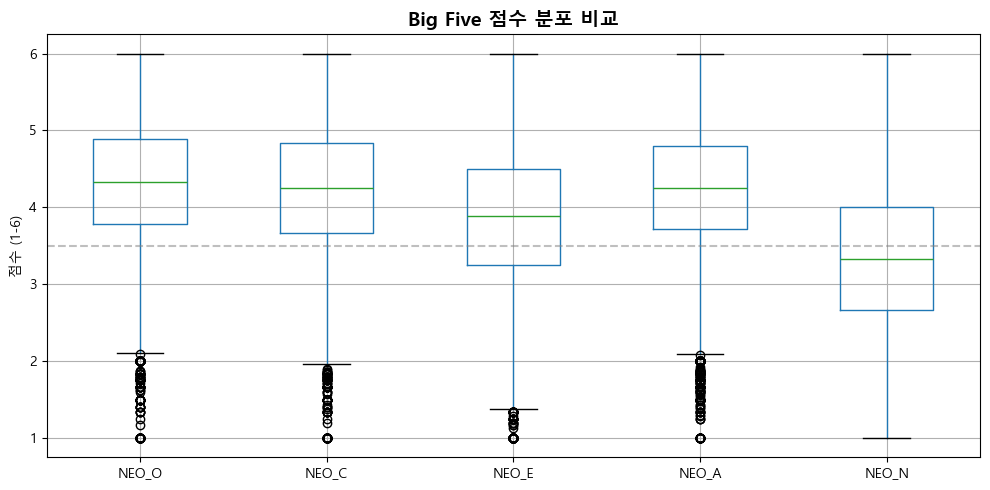

In [9]:
# Big Five 박스플롯
fig, ax = plt.subplots(figsize=(10, 5))
scores[big_five].boxplot(ax=ax)
ax.set_title('Big Five 점수 분포 비교', fontsize=14, fontweight='bold')
ax.set_ylabel('점수 (1-6)')
ax.axhline(3.5, color='gray', linestyle='--', alpha=0.5, label='척도 중앙값')
plt.tight_layout()

# 저장
plt.savefig('reports/big_five_boxplot.png', dpi=150, bbox_inches='tight')
print("✅ 저장: reports/big_five_boxplot.png")
plt.show()

---
## Part 5: 요약

In [10]:
# 생성된 파일 목록
generated_files = [
    'reports/correlation_matrix.png',
    'reports/big_five_distributions.png',
    'reports/ideology_hh_distributions.png',
    'reports/big_five_boxplot.png'
]

print("=" * 50)
print("✅ 시각화 완료!")
print("=" * 50)
print(f"\n생성된 파일:")
for f in generated_files:
    if os.path.exists(f):
        print(f"  ✓ {f}")
    else:
        print(f"  ✗ {f} (생성 안됨)")

✅ 시각화 완료!

생성된 파일:
  ✓ reports/correlation_matrix.png
  ✓ reports/big_five_distributions.png
  ✓ reports/ideology_hh_distributions.png
  ✓ reports/big_five_boxplot.png
